# Comparisions of recent bolo-calc run outputs

3 plots:  Psat, NET, and optical efficiency (all vs. band)

In [1]:
# Standard imports
import numpy as np
import yaml
import matplotlib
import matplotlib.pyplot as plt
import toml
%matplotlib inline  
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 6]

## Define generic plotting routine

In [2]:
def plotxy(model, xname,yname,ptypes, semilogy=False):
    xvec = {'SAT':np.array([]),'SPLAT':np.array([]),'CHLAT':np.array([]) }
    yvec = {'SAT':np.array([]),'SPLAT':np.array([]),'CHLAT':np.array([]) }

    for key1 in [key for key, value in model.items() if 'yaml' in key.lower()]:
        tel = key1.split('_')[0]
        for key2 in model[key1]:
            if key2 != 'defaults':
                xvec[tel] = np.append(xvec[tel],model[key1][key2][xname])
                yvec[tel] = np.append(yvec[tel],model[key1][key2][yname])

    for tel in xvec.keys():
        if semilogy:
            plt.semilogy(xvec[tel],yvec[tel],ptypes[tel],label=tel,markersize=12)
        else:
            plt.plot(xvec[tel],yvec[tel],ptypes[tel],label=tel,markersize=12)
    return xvec,yvec


# Plot Psat vs band center, for all wafer types.

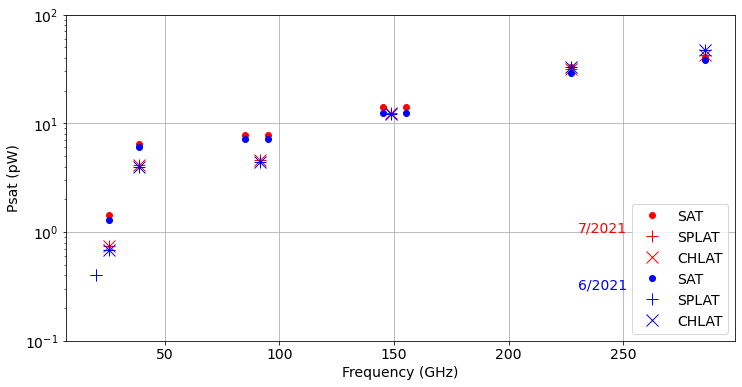

In [3]:
model1 = toml.load('pbdr_v2/outputs/BaseModel.toml')
ptypes =  {'SAT':'.r','SPLAT':'+r','CHLAT':'xr'}
outs1 = plotxy(model1,'bandcenter','psat',ptypes, semilogy=True)

model2 = toml.load('pbdr_v2/outputs_june24/BaseModel.toml')
ptypes =  {'SAT':'.b','SPLAT':'+b','CHLAT':'xb'}
outs2 = plotxy(model2,'bandcenter','psat',ptypes, semilogy=True)

plt.text(230,0.3,'6/2021',color='blue')
plt.text(230,1.0,'7/2021',color='red')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Psat (pW)')
plt.legend()
plt.ylim(0.1,100)
plt.grid()




# Plot NET vs band center, for all wafer types.

Model1


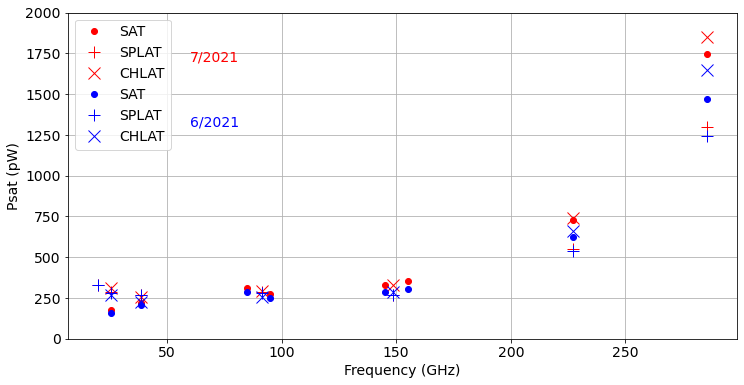

In [4]:
print("Model1")
model1 = toml.load('pbdr_v2/outputs/BaseModel.toml')
ptypes =  {'SAT':'.r','SPLAT':'+r','CHLAT':'xr'}
outs1 = plotxy(model1,'bandcenter','net',ptypes, semilogy=False)

model2 = toml.load('pbdr_v2/outputs_june24/BaseModel.toml')
ptypes =  {'SAT':'.b','SPLAT':'+b','CHLAT':'xb'}
outs2 = plotxy(model2,'bandcenter','net',ptypes, semilogy=False)

plt.text(60,1300,'6/2021',color='blue')
plt.text(60,1700,'7/2021',color='red')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Psat (pW)')
plt.legend()
plt.ylim(0,2000)
plt.grid()




Model1
Model2
Plotting


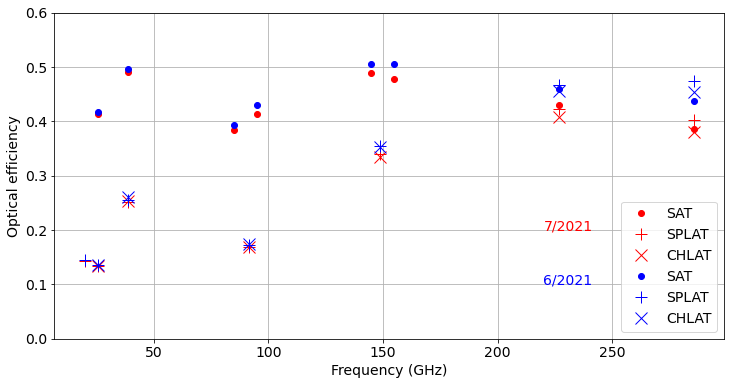

In [5]:
print("Model1")
model1 = toml.load('pbdr_v2/outputs/BaseModel.toml')
ptypes =  {'SAT':'.r','SPLAT':'+r','CHLAT':'xr'}
outs1 = plotxy(model1,'bandcenter','effic',ptypes, semilogy=False)

print("Model2")
model2 = toml.load('pbdr_v2/outputs_june24/BaseModel.toml')
ptypes =  {'SAT':'.b','SPLAT':'+b','CHLAT':'xb'}
outs2 = plotxy(model2,'bandcenter','effic',ptypes, semilogy=False)

print("Plotting")
plt.text(220,0.1,'6/2021',color='blue')
plt.text(220,0.2,'7/2021',color='red')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Optical efficiency')
plt.legend()
plt.ylim(0,0.6)
plt.grid()